In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#global
df = pd.read_csv("../data/data_limpia.csv", encoding="ISO-8859-1", low_memory=False)


In [5]:
print("Resumen de los datos:")
df.info()
df.head()

Resumen de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433907 entries, 0 to 433906
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    433907 non-null  object 
 1   StockCode    433907 non-null  object 
 2   Description  433907 non-null  object 
 3   Quantity     433907 non-null  int64  
 4   InvoiceDate  433907 non-null  object 
 5   UnitPrice    433907 non-null  float64
 6   CustomerID   433907 non-null  float64
 7   Country      433907 non-null  object 
 8   Total        433907 non-null  float64
 9   Year         433907 non-null  int64  
 10  Month        433907 non-null  int64  
 11  Day          433907 non-null  int64  
 12  DayOfWeek    433907 non-null  int64  
 13  Season       433907 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 46.3+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Day,DayOfWeek,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,Winter


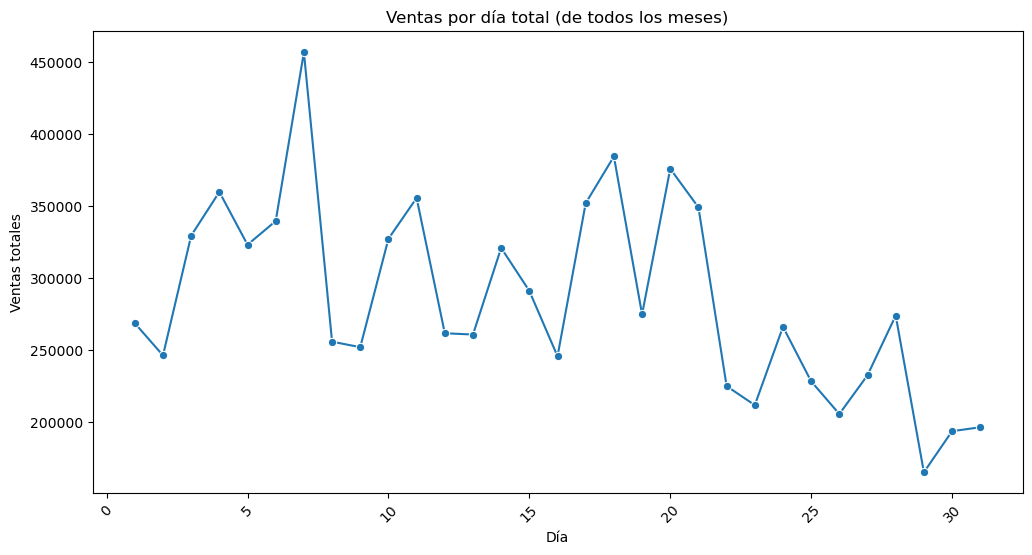

In [18]:
diasVentas = df.groupby('Day')['Total'].sum().reset_index()

# grafico
plt.figure(figsize=(12, 6))
sns.lineplot(data=diasVentas, x='Day', y='Total', marker='o')
# opciones de mostrado
plt.title('Ventas por día total (de todos los meses)')
plt.xlabel('Día')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.show()

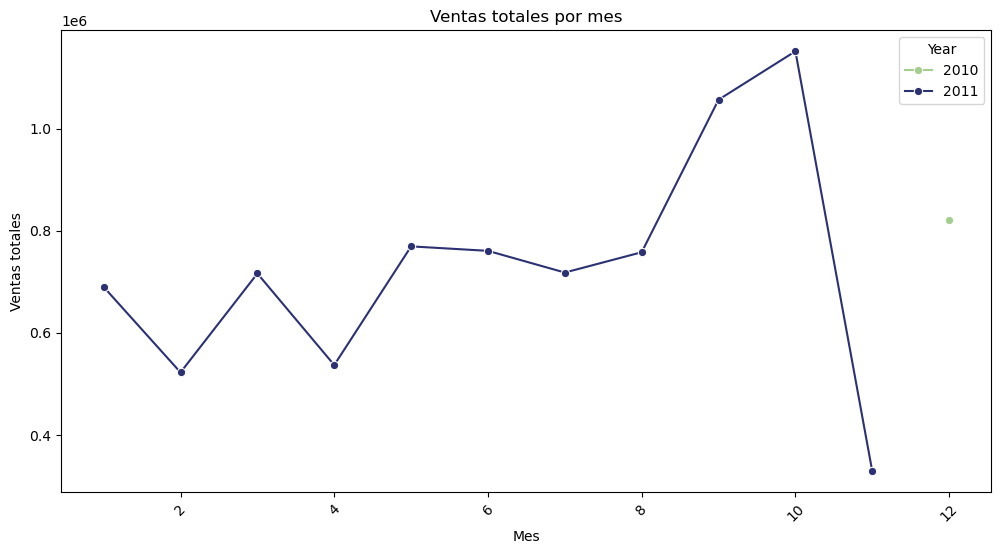

In [20]:
mesesVentas = df.groupby(['Year','Month'])['Total'].sum().reset_index()

# grafico
plt.figure(figsize=(12, 6))
sns.lineplot(data=mesesVentas, x='Month', y='Total', hue='Year', marker='o',palette='crest')
# opciones de mostrado
plt.title('Ventas totales por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')

plt.xticks(rotation=45)
plt.show()

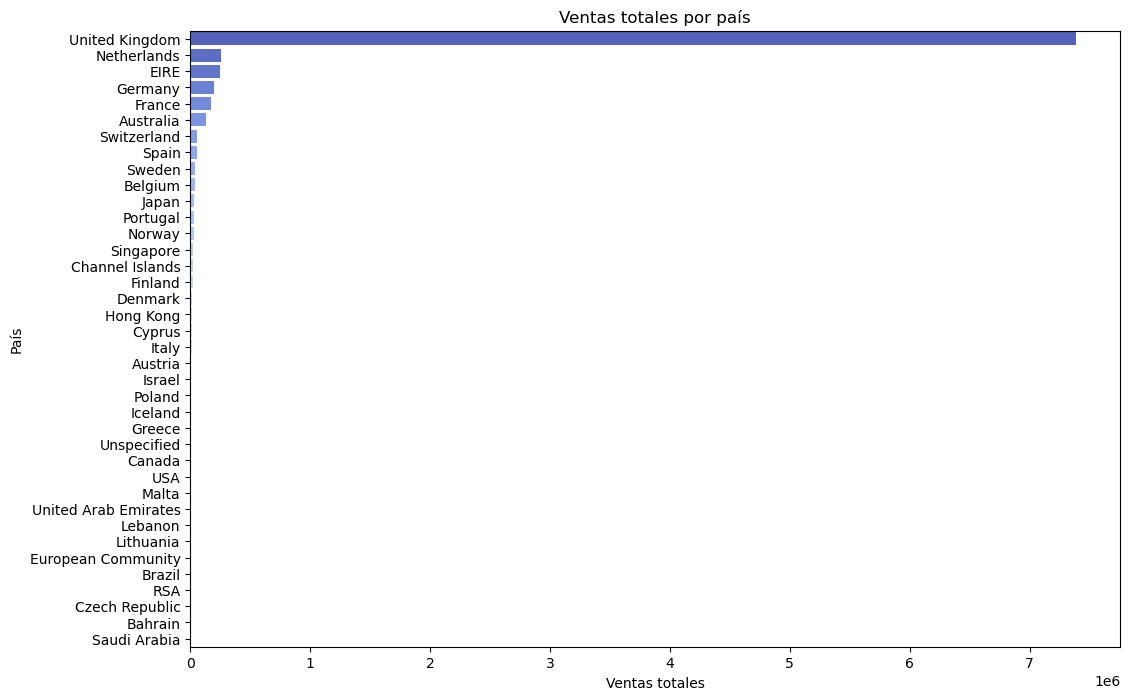

In [30]:
ventaPaises = df.groupby('Country')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

# grafico
plt.figure(figsize=(12, 8))
sns.barplot(data=ventaPaises, x='Total', y='Country', hue='Country', palette='coolwarm')
# opciones de mostrado
plt.title('Ventas totales por país')
plt.xlabel('Ventas totales')
plt.ylabel('País')
plt.show()

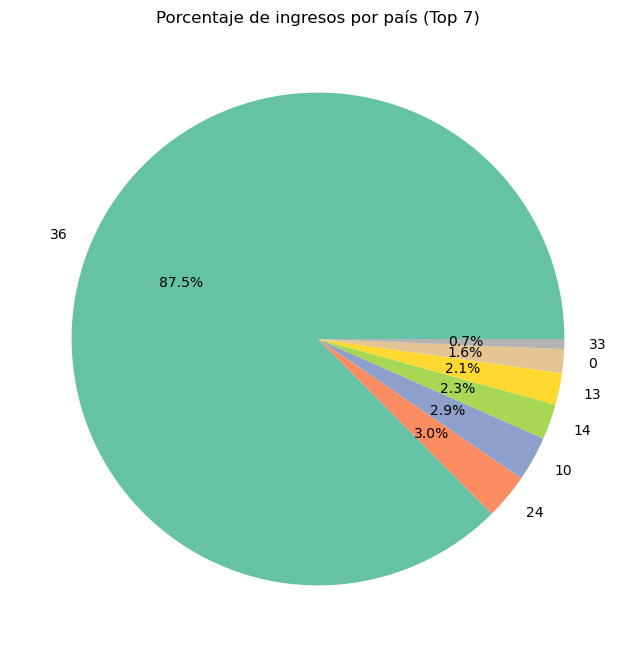

In [46]:
ventaPaisesPorcentaje = ventaPaises['Total'] / ventaPaises['Total'].sum() * 100

# grafico
plt.figure(figsize=(8, 8))
ventaPaisesPorcentaje.sort_values(ascending=False).head(7).plot(kind='pie', autopct='%1.1f%%', cmap='Set2')
# opciones de mostrado
plt.title('Porcentaje de ingresos por país (Top 7)')
plt.ylabel('')
plt.show()

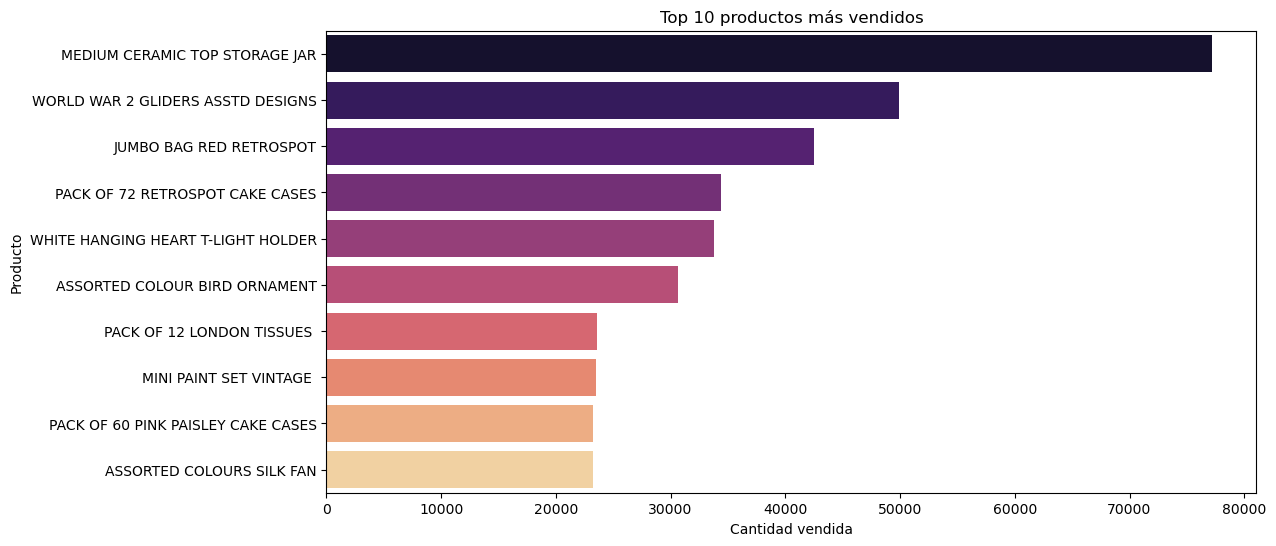

In [50]:
product_sales = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

# grafico
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, x='Quantity', y='Description', hue='Description', palette='magma')
# opciones de mostrado
plt.title('Top 10 productos más vendidos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.show()

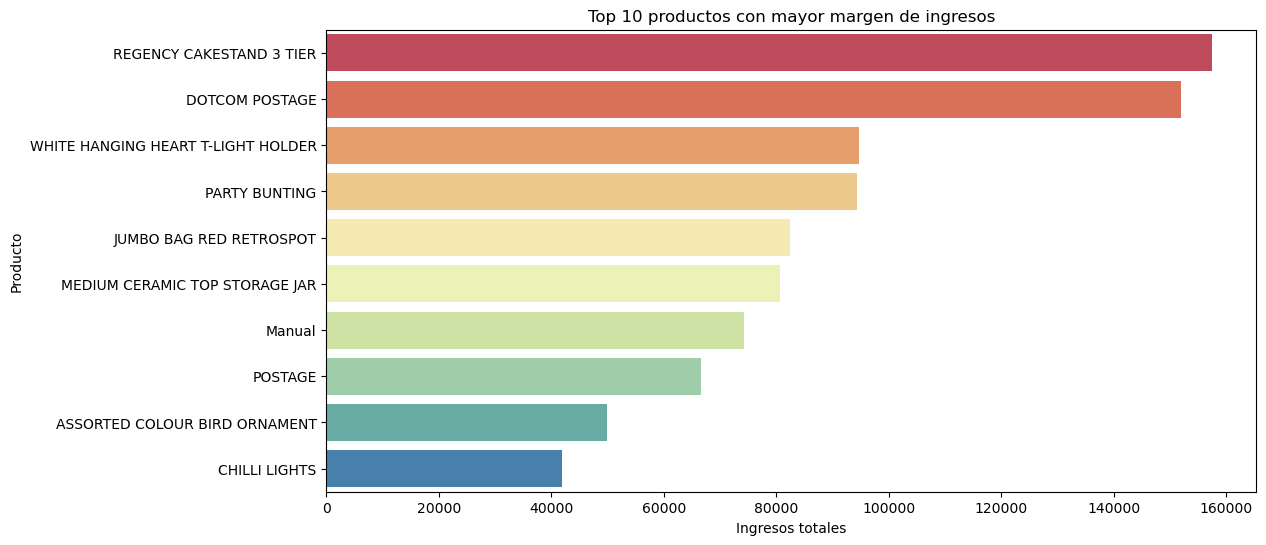

In [52]:
product_revenue = df.groupby('Description')['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=product_revenue, x='Total', y='Description', hue='Description', palette='Spectral')
plt.title('Top 10 productos con mayor margen de ingresos')
plt.xlabel('Ingresos totales')
plt.ylabel('Producto')
plt.show()